# Libraries

In [1]:
#import libraries
import gzip
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import math
from bitarray import bitarray
import pandas as pd
import heapq
import sys
sys.setrecursionlimit(100000)

# Vertex and Graphs classes

Each Vertex uses a dictionary to keep track of the vertices to which it is connected, and the weight of each edge. This dictionary is called connectedTo. The listing below shows the code for the Vertex class. The constructor simply initializes the id, which will typically be a string, and the connectedTo dictionary. The addNeighbor method is used add a connection from this vertex to another. The getConnections method returns all of the vertices in the adjacency list, as represented by the connectedTo instance variable. The getWeight method returns the weight of the edge from this vertex to the vertex passed as a parameter.

In [2]:
#Class for vertex object
class Vertex(object):
    
    #Constuctor of the object Node / istance Node
    def __init__(self, node_id, latitude, longitude):    
        self.id = node_id 
        self.latitude = latitude 
        self.longitude = longitude  
        self.connectedTo = {}
        self.previous = None
    
    #storing for each node its neighbours and 
    #the relative weight
    def addNeighbor(self, nbr, weight = 0):
        self.connectedTo[nbr] = weight       
        
    def __str__(self):
        return str(self.id) + ' connectedTo: ' + str([x.id for x in self.connectedTo])  
    
    #knowing the neighoburs of the node     
    def getConnections(self):
        return list(self.connectedTo.keys())  
    
    #returning the id of a node
    def getId(self):                                            
        return self.id
    #knowing the distance between 
    #a node and the neighbour 
    def getWeight(self, nbr):    
        return self.connectedTo[nbr]
    
    #returning positions of a node
    def getPositions(self):
        return [self.latitude, self.longitude]

The Graph class, shown in the next listing, contains a dictionary that maps vertex names to vertex objects. In Figure 4 this dictionary object is represented by the shaded gray box. Graph also provides methods for adding vertices to a graph and connecting one vertex to another. The getVertices method returns the names of all of the vertices in the graph. In addition, we have implemented the __iter__ method to make it easy to iterate over all the vertex objects in a particular graph. Together, the two methods allow you to iterate over the vertices in a graph by name, or by the objects themselves.

In [3]:
#Classes representing the 3 Graphs:
#Graph with Physical distances
class Graph_physical:    
    def __init__(self):
        self.vertList = {} 
        self.numVertices = 0  
    #Adding new vertex for the graph and mapping it
    #into the dictionary of the graph
    def addVertex(self, key, latitude, longitude):
        self.numVertices = self.numVertices + 1   
        newVertex = Vertex(key, latitude, longitude) 
        self.vertList[key] = newVertex
        return newVertex 
    
    #Obtatining lat e lot of all the nodes of the graph
    def getPositions(self):
        positions = []
        for n in self.vertList:
            node = self.vertList[n]
            pos = node.getPositions()
            positions.append(pos)
        return positions
    
    #Recalling the istance related to the key 'n' in vertList
    def getVertex(self, n):
        if n in self.vertList:
            return self.vertList[n]  
        else:
            return None

    def __contains__(self, n):
        return n in self.vertList
    
    #Adding an edge between two nodes
    def addEdge(self, f, t, weight = 0):
        if f not in self.vertList:
            nv = self.addVertex(f)
        if t not in self.vertList:
            nv = self.addVertex(t)
        self.vertList[f].addNeighbor(self.vertList[t], weight)
    
    #obtaining all the vertices of the graph
    def getVertices(self):
        return self.vertList.keys() 

    def __iter__(self):
        return iter(self.vertList.values())
    
#2. Graph with time Distance
class Graph_time:    
    def __init__(self):
        self.vertList = {}  
        self.numVertices = 0  

    def addVertex(self, key, latitude, longitude):
        self.numVertices = self.numVertices + 1   
        newVertex = Vertex(key, latitude, longitude) 
        self.vertList[key] = newVertex 
        return newVertex  

    def getVertex(self, n):
        if n in self.vertList:
            return self.vertList[n]  
        else:
            return None

    def __contains__(self, n):
        return n in self.vertList

    def addEdge(self, f, t, weight=0):
        if f not in self.vertList:
            nv = self.addVertex(f)
        if t not in self.vertList:
            nv = self.addVertex(t)
        self.vertList[f].addNeighbor(self.vertList[t], weight)

    def getVertices(self):
        return self.vertList.keys() 

    def __iter__(self):
        return iter(self.vertList.values())

#Graph for network distance
class Graph_network:    
    def __init__(self):
        self.vertList = {}  
        self.numVertices = 0  

    def addVertex(self, key, latitude, longitude):
        self.numVertices = self.numVertices + 1  
        newVertex = Vertex(key, latitude, longitude) 
        self.vertList[key] = newVertex 
        return newVertex  

    def getVertex(self, n):
        if n in self.vertList:
            return self.vertList[n]  
        else:
            return None

    def __contains__(self, n):
        return n in self.vertList

    def addEdge(self, f, t, weight=0):
        if f not in self.vertList:
            nv = self.addVertex(f)
        if t not in self.vertList:
            nv = self.addVertex(t)
        self.vertList[f].addNeighbor(self.vertList[t], weight)

    def getVertices(self):
        return list(self.vertList.keys()) 

    def __iter__(self):
        return iter(self.vertList.values())

# Opening and cleaning the files

### Coordinates file

In [4]:
#cleaning coordinates file
coord_file = []
f1 = gzip.open('USA-road-d.CAL.co.gz','rb')
coord_file = f1.readlines()
coord_file = coord_file[7:]
for i in range(len(coord_file)):
    coord_file[i] = str(coord_file[i])
    coord_file[i] = coord_file[i].replace("\\n",'')
    coord_file[i] = coord_file[i].replace("'",'')
    coord_file[i] = coord_file[i].split(' ')
    coord_file[i].remove(coord_file[i][0])  
    coord_file[i][1]= float((coord_file[i][1])[:4] + '.' + (coord_file[i][1])[4:]) 
    coord_file[i][2]= float((coord_file[i][2])[:2] + '.' + (coord_file[i][2])[2:])

### Physical Distance File 

In [5]:
#cleaning physical distance file        
dist_file = []      
f2 = gzip.open('USA-road-d.CAL.gr.gz','rb')
dist_file = f2.readlines()
dist_file = dist_file[7:]
for i in range(len(dist_file)):
    dist_file[i] = str(dist_file[i])
    dist_file[i] = dist_file[i].replace("\\n",'')
    dist_file[i] = dist_file[i].replace("'",'')
    dist_file[i] = dist_file[i].split(' ')
for i in range(len(dist_file)):
    dist_file[i].remove(dist_file[i][0])

### Time Distance File

In [6]:
#cleaning time distances file 
time_file = []             
f3 = gzip.open('USA-road-t.CAL.gr.gz','rb')
time_file = f3.readlines()
time_file = time_file[7:]
for i in range(len(time_file)):
    time_file[i] = str(time_file[i])
    time_file[i] = time_file[i].replace("\\n",'')
    time_file[i] = time_file[i].replace("'",'')
    time_file[i] = time_file[i].split(' ')
for i in range(len(time_file)):
    time_file[i].remove(time_file[i][0])

# Creating the Graphs

### Physical distances

In [7]:
#Creating the Graph with physical distances        
G_physical = Graph_physical()
for city in coord_file:
    G_physical.addVertex(city[0], city[1], city[2])
for link in dist_file:
    G_physical.addEdge(link[0], link[1], weight = link[2])

### Time distances

In [8]:
#Creating the Graph with time distances
G_time = Graph_time()
for city in coord_file:
    G_time.addVertex(city[0], city[1], city[2])
for link in time_file:
    G_time.addEdge(link[0], link[1], weight = link[2])

### Network distances

In [9]:
#Creating the graph with network distances
G_network = Graph_network()
for city in coord_file:
    G_network.addVertex(city[0], city[1], city[2])
for link in dist_file:
    G_network.addEdge(link[0], link[1], weight = 1)

## Storing latitudes and longitudes in a list

In [10]:
#taking all the longitudes and latitudes       
lat = []
lon = []
for city in coord_file:
    lat.append(city[1])
    lon.append(city[2])

# Main part for choosing which function the user wants to use and which kind of distance

In [11]:
#The four functions belows allow the user to choose
#between physical, network and time distance    
def choice_distance_1():    
    dist_choice = int(input('Choose between: \n1.Physical distance; \n2.Time distance; \n3.Network distance. \nYour choice: ', ))
    if dist_choice == 1:
        func_1.Function_1(G_physical, 'violet', lat, lon)
    elif dist_choice == 2:
        func_1.Function_1(G_time, 'azul', lat, lon)
    elif dist_choice == 3:
        func_1.Function_1(G_network, 'white', lat, lon)
    else:
        print('Please, enter a value between: 1 - 2 - 3')
        return choice_distance_1()
                 
def choice_distance_2():    
    dist_choice = int(input('Choose between: \n1.Physical distance; \n2.Time distance; \n3.Network distance. \nYour choice: ', ))
    if dist_choice == 1:
        func_2.Function_2(G_physical)
    elif dist_choice == 2:
        func_2.Function_2(G_time)
    elif dist_choice == 3:
        func_2.Function_2(G_network)
    else:
        print('Please, enter a value between: 1 - 2 - 3')
        return choice_distance_2()
                 
def choice_distance_3():    
    dist_choice = int(input('Choose between: \n1.Physical distance; \n2.Time distance; \n3.Network distance. \nYour choice: ', ))
    if dist_choice == 1:
        func_3.Function_3(G_physical, lat, lon)
    elif dist_choice == 2:
        func_3.Function_3(G_time, lat, lon)
    elif dist_choice == 3:
        func_3.Function_3(G_network, lat, lon)
    else:
        print('Please, enter a value between: 1 - 2 - 3')
        return choice_distance_3()

def choice_distance_4():
    dist_choice = int(input('Choose between: \n1.Physical distance; \n2.Time distance; \n3.Network distance. \nYour choice: ', ))
    if dist_choice == 1:
        func_4.Function_4(G_physical, lat, lon)
    elif dist_choice == 2:
        func_4.Function_4(G_time, lat, lon)
    elif dist_choice == 3:
        func_4.Function_4(G_network, lat, lon)
    else:
        print('Please, enter a value between: 1 - 2 - 3')
        return choice_distance_4()

In [12]:
#This function allows the user to choose which function he wants to use
def Function_to_use():
    f_choice = int(input('Choose between: \n1.Find the Neighbours!; \n2.Find the smartest Network!; \n3.Shortest Ordered Route; \n4.Shortest Route. \nYour choice: ', ))
    if f_choice == 1:
        return choice_distance_1()
    elif f_choice == 2:
        return choice_distance_2()
    elif f_choice == 3:
        return choice_distance_3()
    elif f_choice == 4:
        return choice_distance_4()
    else:
        print('Please, enter a value between: 1 - 2 - 3 - 4')
        return Function_to_use()

# Showing some results directly from the main.py

In [1]:
import main

## 3. Shortest Ordered Route

In this program the starting point is represented by a star, and the nodes to be reached by violet triangles with their nome above the triangle.

Choose between: 
1.Find the Neighbours!; 
2.Find the smartest Network!; 
3.Shortest Ordered Route; 
4.Shortest Route. 
Your choice: 3
Choose between: 
1.Physical distance; 
2.Time distance; 
3.Network distance. 
Your choice: 2
Input the starting node: 3785
Which are the nodes that you want to visit? : 39183 301934 34892 13294
The total distance of the walk is:  35685642


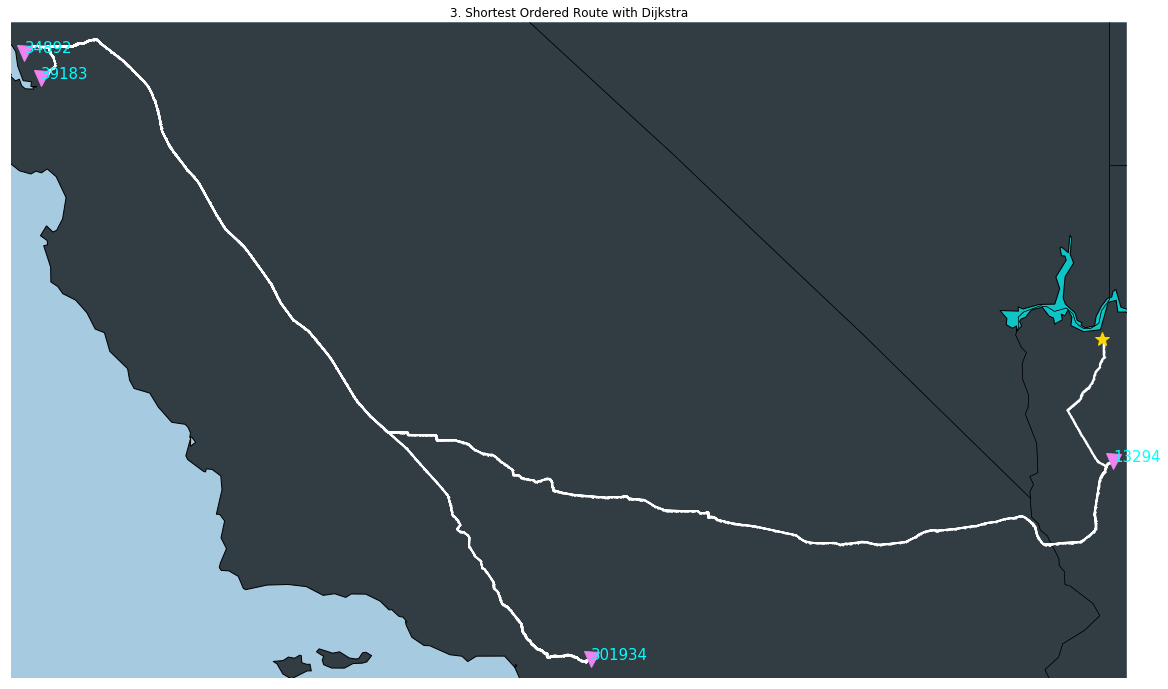

In [15]:
main.Function_to_use()

Choose between: 
1.Find the Neighbours!; 
2.Find the smartest Network!; 
3.Shortest Ordered Route; 
4.Shortest Route. 
Your choice: 3
Choose between: 
1.Physical distance; 
2.Time distance; 
3.Network distance. 
Your choice: 1
Input the starting node: 75
Which are the nodes that you want to visit? : 89 19 70 85 24 40
The total distance of the walk is:  549616


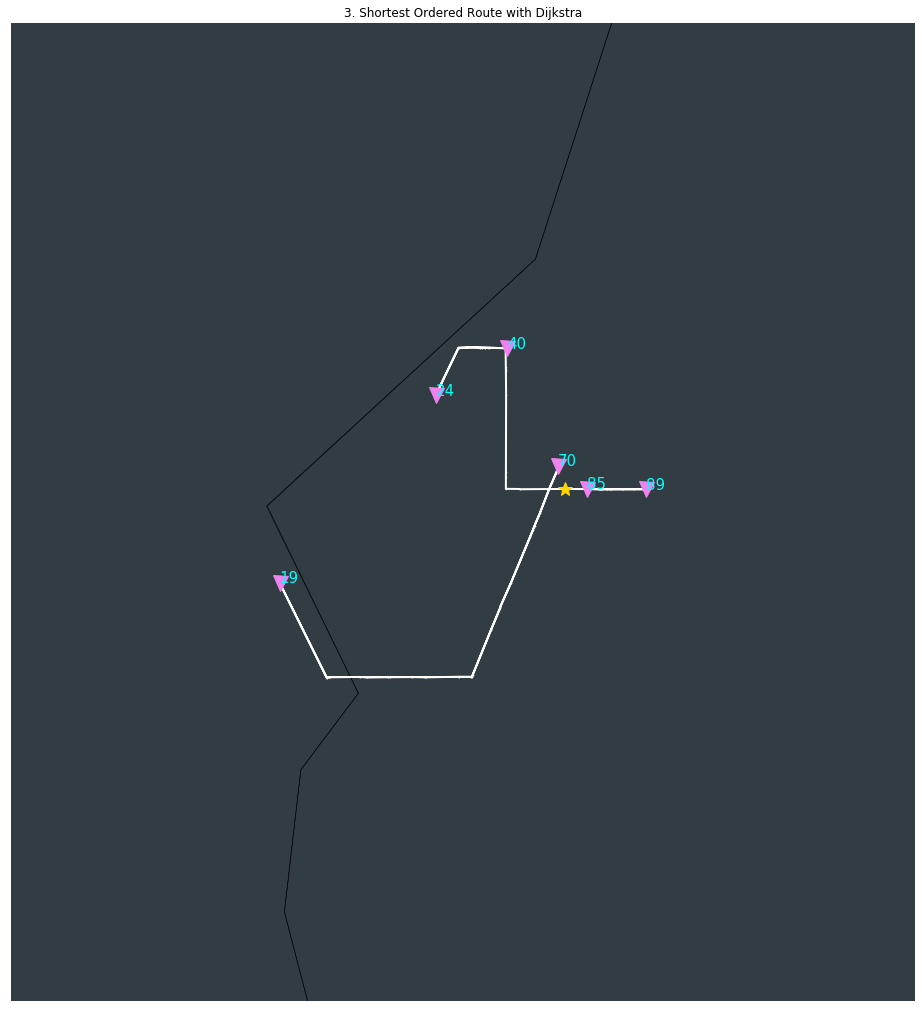

In [16]:
main.Function_to_use()

## 4. Shortest Route

For the fourth point we are going to use the same starting nodes and the same walks of the third point in order to show how the algorithm work differently and also the results are different.
In this program the starting point is represented by a star, and the nodes to be reached by violet triangles with their nome above the triangle.

Choose between: 
1.Find the Neighbours!; 
2.Find the smartest Network!; 
3.Shortest Ordered Route; 
4.Shortest Route. 
Your choice: 4
Choose between: 
1.Physical distance; 
2.Time distance; 
3.Network distance. 
Your choice: 2
Enter the starting node: 3785
Which are the nodes that you want to visit? : 39183 301934 34892 13294
The 1 node to visit is: 301934
The 2 node to visit is: 34892
The 3 node to visit is: 39183
The 4 node to visit is: 13294
The total distance of the walk is : 24092309


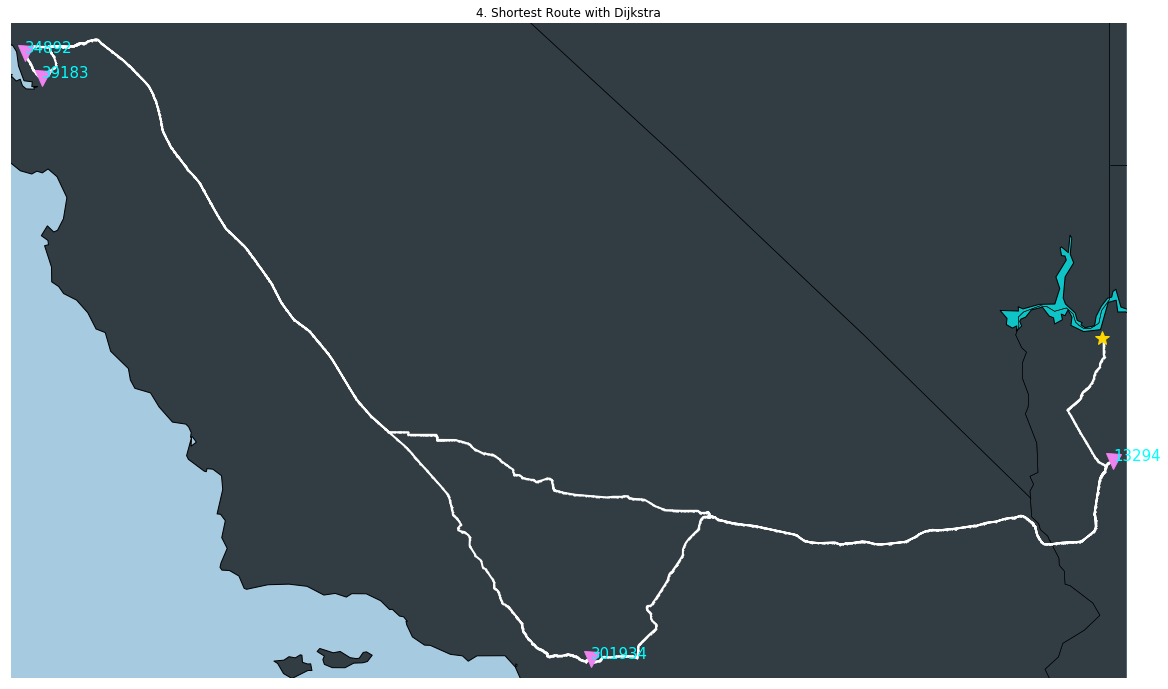

In [17]:
main.Function_to_use()

Choose between: 
1.Find the Neighbours!; 
2.Find the smartest Network!; 
3.Shortest Ordered Route; 
4.Shortest Route. 
Your choice: 4
Choose between: 
1.Physical distance; 
2.Time distance; 
3.Network distance. 
Your choice: 1
Enter the starting node: 75
Which are the nodes that you want to visit? : 89 19 70 85 24 40
The 1 node to visit is: 85
The 2 node to visit is: 89
The 3 node to visit is: 70
The 4 node to visit is: 24
The 5 node to visit is: 19
The 6 node to visit is: 40
The total distance of the walk is : 384458


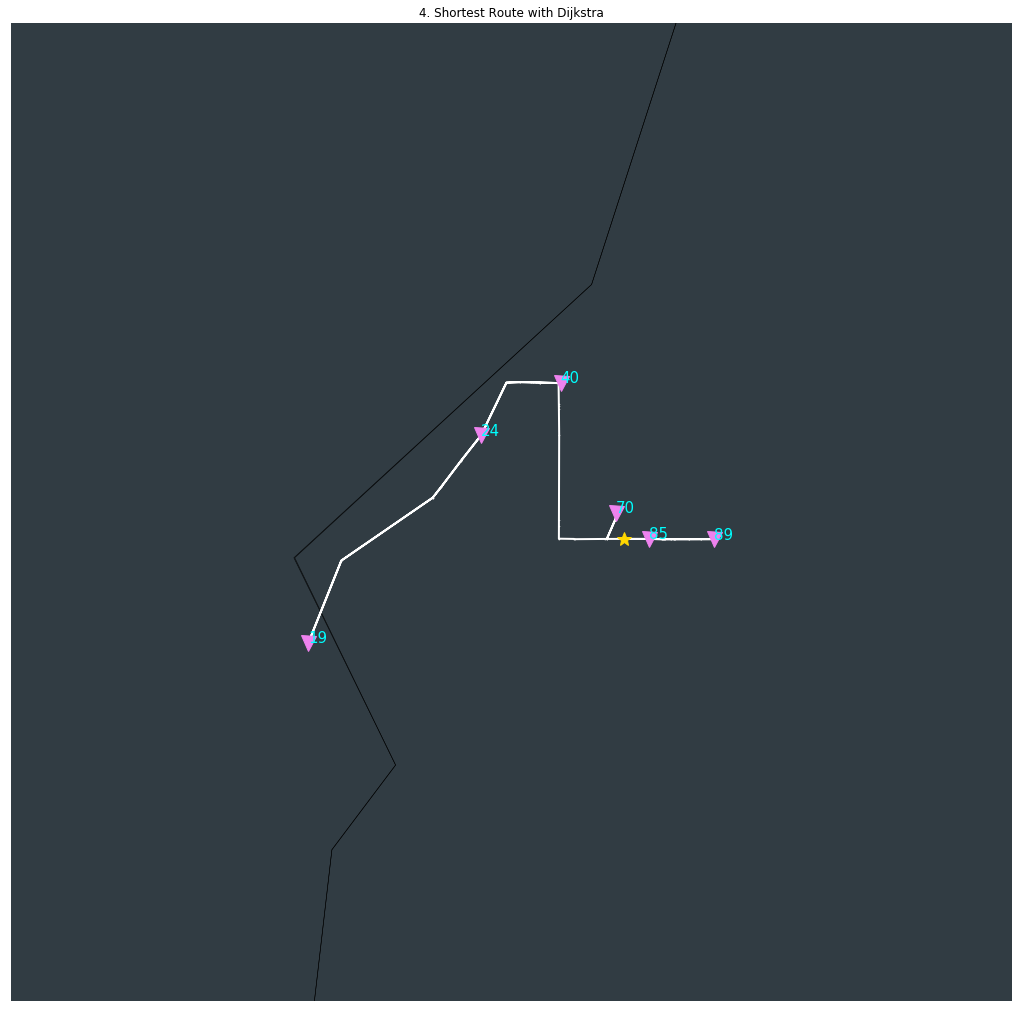

In [14]:
main.Function_to_use()